In [13]:
import numpy, scipy
import numpy.linalg, numpy.random
from mpl_toolkits.basemap import Basemap
from matplotlib import pyplot

%matplotlib nbagg

cos = numpy.cos; sin = numpy.sin

***do a big module***

In [17]:
import scha
from importlib import reload
reload(scha)
import fibonacci_sphere

In [461]:
def sph2ll(th, ph):
    return (numpy.rad2deg(ph), 90. - numpy.rad2deg(th))

In [386]:
th, ph = fibonacci_sphere.grid(2000)
th = th[100:120]; ph = ph[100:120]
pole_th, pole_ph = th[10], ph[10]

rot_mat = scha.rotation_matrix(pole_th, pole_ph, invert=True)
r = 1.0
r, th_r, ph_r = scha.rotate_coords(r, th, ph, rot_mat)

<IPython.core.display.Javascript object>


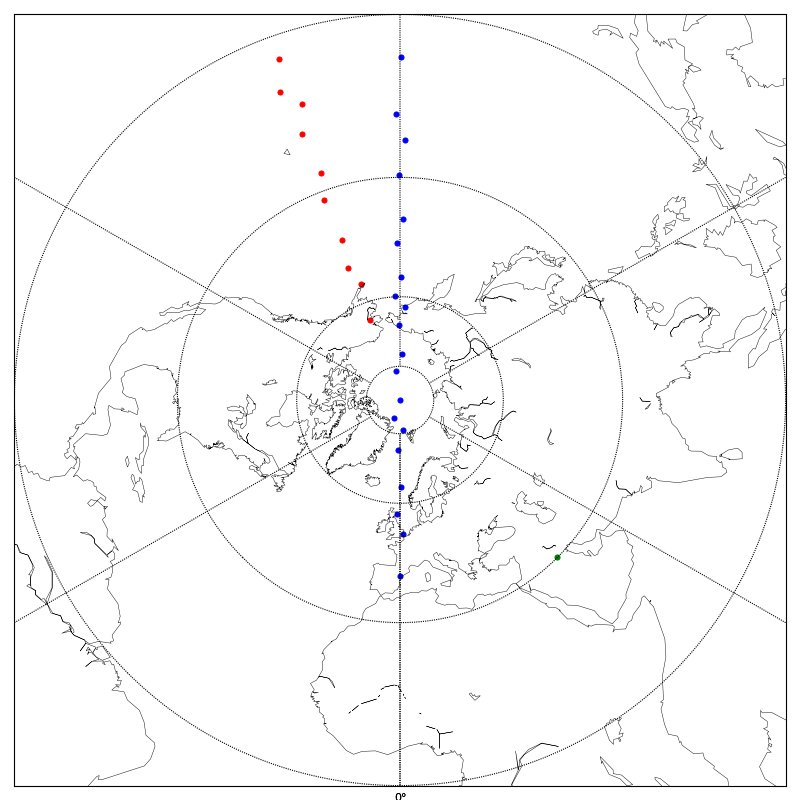

In [387]:
base=Basemap(projection="npstere", lon_0=0.0, boundinglat=0, resolution="c")

fig, ax = pyplot.subplots(figsize=(10, 10))
base.drawcoastlines(ax=ax, linewidth=0.4)
base.drawparallels(numpy.arange(-60.,90.,30.),ax=ax)
base.drawmeridians(numpy.arange(0.,420.,60.),labels=[0,0,0,1],fontsize=10,ax=ax)
base.drawmapboundary(ax=ax)

base.scatter(numpy.rad2deg(ph), 90-numpy.rad2deg(th), latlon=True, ax=ax, color="red")
base.scatter(numpy.rad2deg(ph_p), 90-numpy.rad2deg(th_p), latlon=True, ax=ax, color="green")
base.scatter(numpy.rad2deg(ph_r), 90-numpy.rad2deg(th_r), latlon=True, ax=ax, color="blue")

fig.tight_layout()

pyplot.show(fig)

In [388]:
import xyzfield
        

In [512]:
r, th, ph = 1.0, numpy.pi/3+0.7, 0
th_p, ph_p = numpy.pi/3, 0

In [513]:
r, th_r, ph_r = scha.rotate_coords(r, th, ph, scha.rotation_matrix(th_p, ph_p, invert=True))

In [514]:
x, y, z = (1, 0, 2)

In [515]:
scha.rotate_vector(x, y, z, th_p, ph_p, th, ph, th_r)

array([ 1.,  0.,  2.])

In [516]:
numpy.rad2deg(xyzfield.xyz2difh(*scha.rotate_vector(x, y, z, th_p, ph_p, th, ph, th_r))[0])

0.0

In [517]:
numpy.arcsin(sin(th_p)*sin(ph_p-ph)/sin(th_r))

0.0

***BIG TEST*** NICE

In [531]:
#big zone
th_p, ph_p = numpy.deg2rad((90-45, 0))
radius = numpy.deg2rad(22)

#points
th = numpy.random.normal(loc=th_p, scale=radius/6, size=30)
ph = numpy.random.normal(loc=ph_p, scale=radius/6, size=30)

#rotated points
r, th_r, ph_r = scha.rotate_coords(1.0, th, ph, scha.rotation_matrix(th_p, ph_p, invert=True))
r_p, th_pr, ph_pr = scha.rotate_coords(1.0, th_p, ph_p, scha.rotation_matrix(th_p, ph_p, invert=True))

#shit vectors
x, y, z = numpy.ones_like(th), numpy.zeros_like(th), numpy.zeros_like(th)
x_r, y_r, z_r = numpy.empty_like(x), numpy.empty_like(y), numpy.empty_like(z)

for i, (xx, yy, zz, th_i, phi_i, th_ri) in enumerate(zip(x,y,z,th,ph,th_r)):
    x_r[i], y_r[i], z_r[i] = scha.rotate_vector(xx, yy, zz, th_p, ph_p, th_i, phi_i, th_ri)

<IPython.core.display.Javascript object>


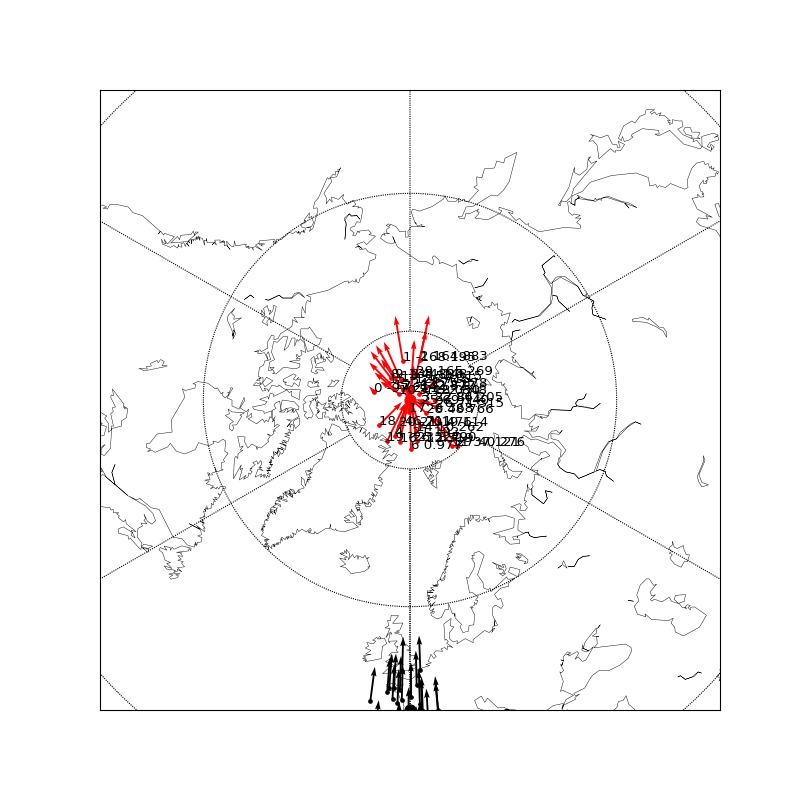

In [542]:
base=Basemap(projection="npaeqd", lon_0=0.0, boundinglat=45, resolution="c")

fig, ax = pyplot.subplots(figsize=(10, 10))
base.drawcoastlines(ax=ax, linewidth=0.4)
base.drawparallels(numpy.arange(-60.,90.,30.),ax=ax)
base.drawmeridians(numpy.arange(0.,420.,60.),fontsize=10,ax=ax)
base.drawmapboundary(ax=ax)

base.scatter(*sph2ll(th_p, ph_p), latlon=True, ax=ax, color="black", s=100)
base.scatter(*sph2ll(th, ph), latlon=True, ax=ax, color="black", s=10)

base.scatter(*sph2ll(th_pr, ph_pr), latlon=True, ax=ax, color="red", s=100)
base.scatter(*sph2ll(th_r, ph_r), latlon=True, ax=ax, color="red", s=10)

u, v = numpy.array(base(*(sph2ll(th,ph)+numpy.array((y,x))/1000))) - numpy.array(base(*sph2ll(th,ph)))
base.quiver(*sph2ll(th,ph), u, v, latlon=True, width=0.003, color="black")

# this is fucknginf wrong
#u_r, v_r = numpy.array(base(*(sph2ll(th_r,ph_r)+numpy.array((y_r,x_r))/1000))) - numpy.array(base(*sph2ll(th_r,ph_r)))
#base.quiver(*sph2ll(th_r,ph_r), u_r, v_r, latlon=True, width=0.003, color="red")

decs=numpy.rad2deg(xyzfield.xyz2difh(x_r,y_r,z_r)[0])
for i, (t, p, dec) in enumerate(zip(th_r, ph_r, decs)):
    ax.text(*base(*sph2ll(t, p)), "{:} {:4.3f}".format(i, dec))

In [536]:
decs[0]

-97.211004681824178

In [537]:
th[0]

0.76935261818532763

In [538]:
ph[0]

-0.13103839571336867

In [539]:
r, th_test, ph_test = scha.rotate_coords(r, th[0], ph[0], scha.rotation_matrix(th_p, ph_p, invert=True))
scha.rotate_vector(x[0], y[0], z[0], th_p, ph_p, th[0], ph[0], th_test)

array([-0.12552378, -0.99209061,  0.        ])

In [530]:
x_r[6]

-0.98004670070738009

In [18]:
scha.schmidt_real(0,2)

array(1.0)